This data show how customer using electric in time:

00:00 - 05:45: morning

06:00 - 08:45: breakfast

09:00 - 13:45: working time 1 (including lunch)

14:00 - 17:45: working time 2

18:00 - 20:45: dinner

21:00 - 23:45: night

In [70]:
import pandas as pd #Using pandas to read csv data

from matplotlib import pyplot as plt #for ploting

import numpy as np

from scipy import signal

Text(0.5, 0, 'Sample')

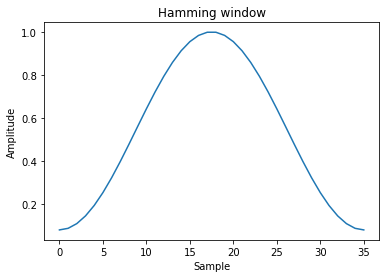

In [79]:
window = signal.windows.hamming(36)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

In [80]:
#apply window is a good idea, peak at 12PM
def convertCommaDot(s):
    return float(s.replace(',','.'))

def average_list(dataframe, rowNr, startColumn, endColumn):
    data = dataframe.iloc[rowNr, startColumn:endColumn]
    window = signal.windows.hamming(len(data))
    data = data.to_numpy()
    data = np.multiply(data,window)
    #data = list(map(convertCommaDot, data))
    return sum(data)/len(data)

def peak_list(dataframe, rowNr, startColumn, endColumn):
    data = dataframe.iloc[rowNr, startColumn:endColumn]
    #print(type(data))
    #data = list(map(convertCommaDot, data))
    return max(data)

def total_consum(dataframe, row):
    pass
    
    
def read_csv(csvFilename,startRow, endRow):
    listAverage = []
    listPeak = []
    dataframe = pd.read_csv(csvFilename, delimiter=',', low_memory=False)
    for day in range(startRow, endRow): #test for 2019/H1
        dataPeak = peak_list(dataframe, day, 39, 63)
        dataAverage = average_list(dataframe, day, 39, 63)
        listAverage.append(dataAverage)
        listPeak.append(dataPeak)
    
    #classification = dataframe.iloc[startRow:endRow, 99]
    
    ar = np.asarray(listAverage)   
    plt.hist(ar,bins=25, density=True, alpha=0.6, color='b')
    plt.show()
    
    plt.scatter(listAverage, listPeak)
    plt.show()

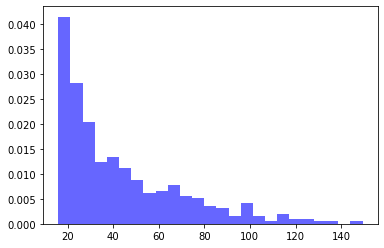

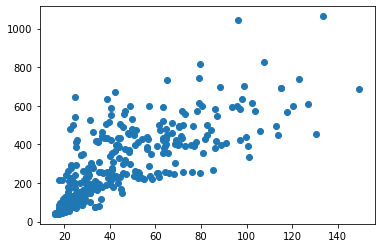

In [81]:
csvFilename = "./not_GMT.csv"
read_csv(csvFilename, 0,365 )

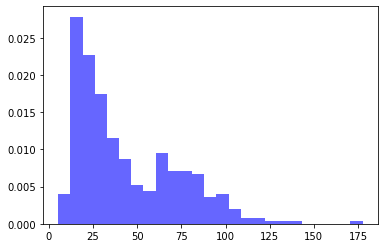

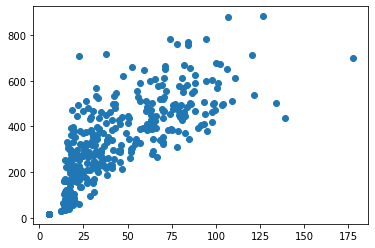

In [82]:
read_csv(csvFilename, 365, 730 )

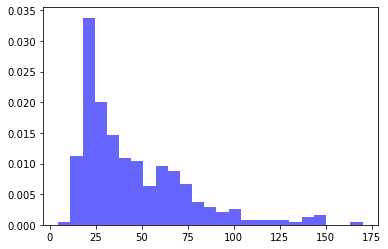

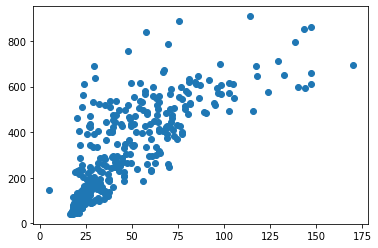

In [83]:
read_csv(csvFilename, 730, 1096 )

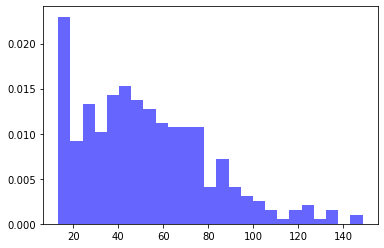

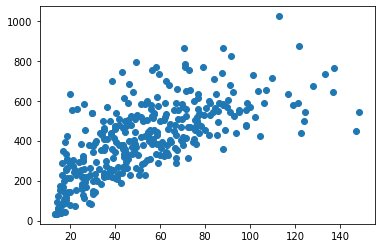

In [84]:
read_csv(csvFilename, 1096,1462 )